<a href="https://colab.research.google.com/github/barath-sk17/IntrusionDetection/blob/main/Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Train_data.csv to Train_data.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Test_data.csv')
df.head(0)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate


In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
df.drop_duplicates(keep=False, inplace=True)

In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [ ]:
df.reset_index(inplace=True)

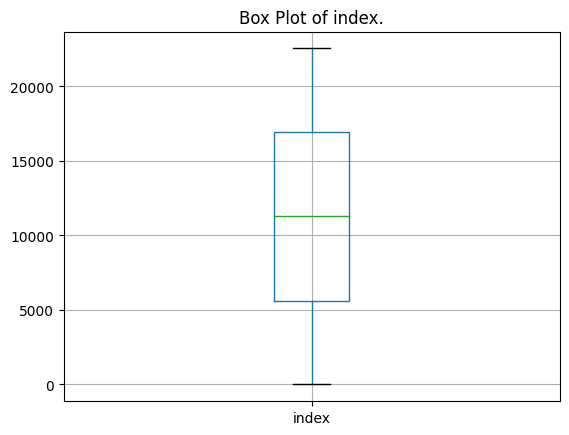

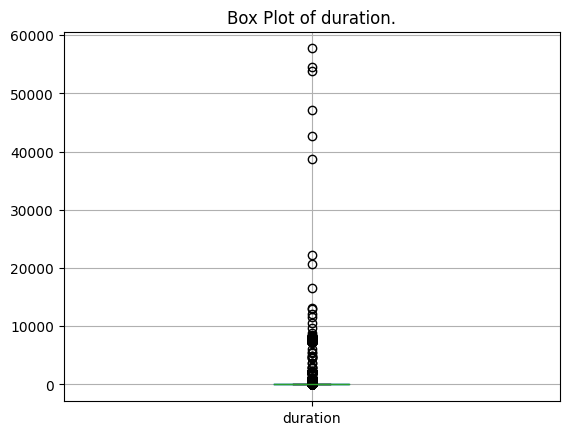

KeyError: "None of [Index(['protocol_type'], dtype='object')] are in the [columns]"

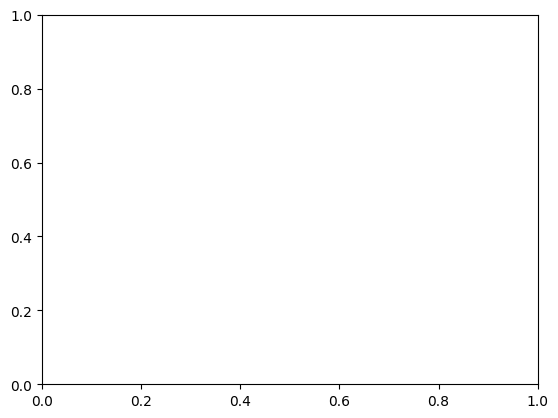

In [ ]:
import matplotlib.pyplot as plt

column_lists = []
for column in df.columns:
    df.boxplot(column=[column])
    plt.title('Box Plot of {}.'.format(column))
    plt.show()

In [ ]:
from scipy.stats import binned_statistic

In [ ]:
bin_method = 'bin_mean'  # You can also use 'bin_median' or 'bin_boundary'

In [ ]:
data_range = (df['src_bytes'].min(), df['src_bytes'].max())

In [ ]:
bin_edges = np.linspace(data_range[0], data_range[1], num=10)

In [ ]:
data_range

(0, 62825648)

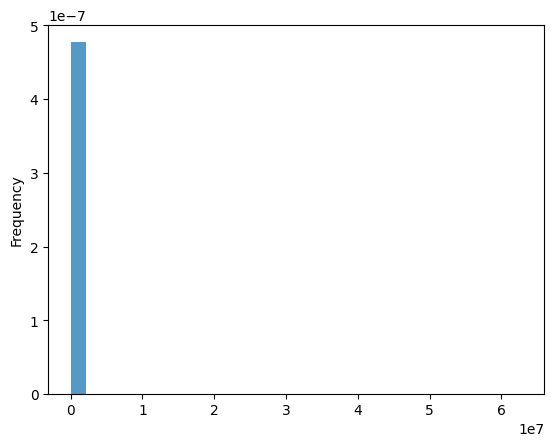

In [ ]:
hist_data = df['src_bytes'].plot.hist(bins=30, density=True, alpha=0.75)

In [ ]:
binned_data = binned_statistic(df['src_bytes'], df['src_bytes'], bins=bin_edges, statistic='mean')

In [ ]:
binned_data

BinnedStatisticResult(statistic=array([6.23650945e+03,            nan,            nan,            nan,
       3.16456080e+07,            nan,            nan,            nan,
       6.28256480e+07]), bin_edges=array([       0.        ,  6980627.55555556, 13961255.11111111,
       20941882.66666667, 27922510.22222222, 34903137.77777778,
       41883765.33333334, 48864392.8888889 , 55845020.44444445,
       62825648.        ]), binnumber=array([1, 1, 1, ..., 1, 1, 1]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(binned_data)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/Train_data.csv")

X = data.iloc[:,4:20]  #independent columns
#print(X)
y = data.iloc[:,-1]    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                 Specs         Score
0            src_bytes  1.984425e+08
1            dst_bytes  6.824754e+06
7            logged_in  7.218836e+03
11            num_root  5.203636e+03
8      num_compromised  4.159919e+03
3       wrong_fragment  6.848763e+02
12  num_file_creations  1.610498e+02
5                  hot  9.730474e+01
14    num_access_files  7.736355e+01
10        su_attempted  2.968711e+01


Representing in terms of bar graph

[2.41320446e-01 2.03187673e-01 2.02526489e-05 5.91087446e-03
 7.91341840e-05 1.99125207e-02 3.83577657e-04 5.20217033e-01
 6.76560349e-03 3.50119307e-04 2.01265573e-04 5.18028074e-04
 3.81897509e-04 7.53447854e-05 6.76230006e-04 0.00000000e+00]


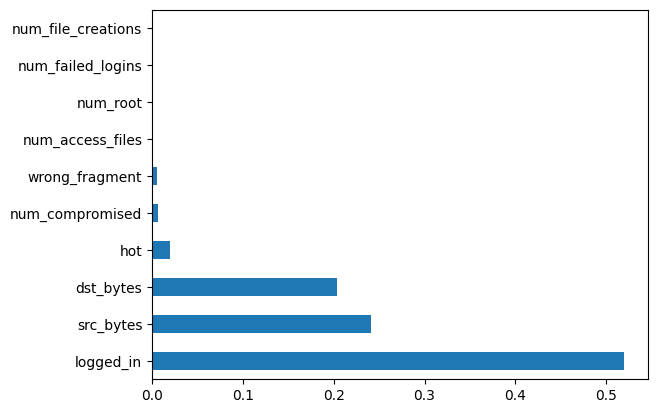

In [8]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/Train_data.csv")

X = data.iloc[:,4:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Correlation Matrix with Heatmap

<ipython-input-9-47f8a3963585>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


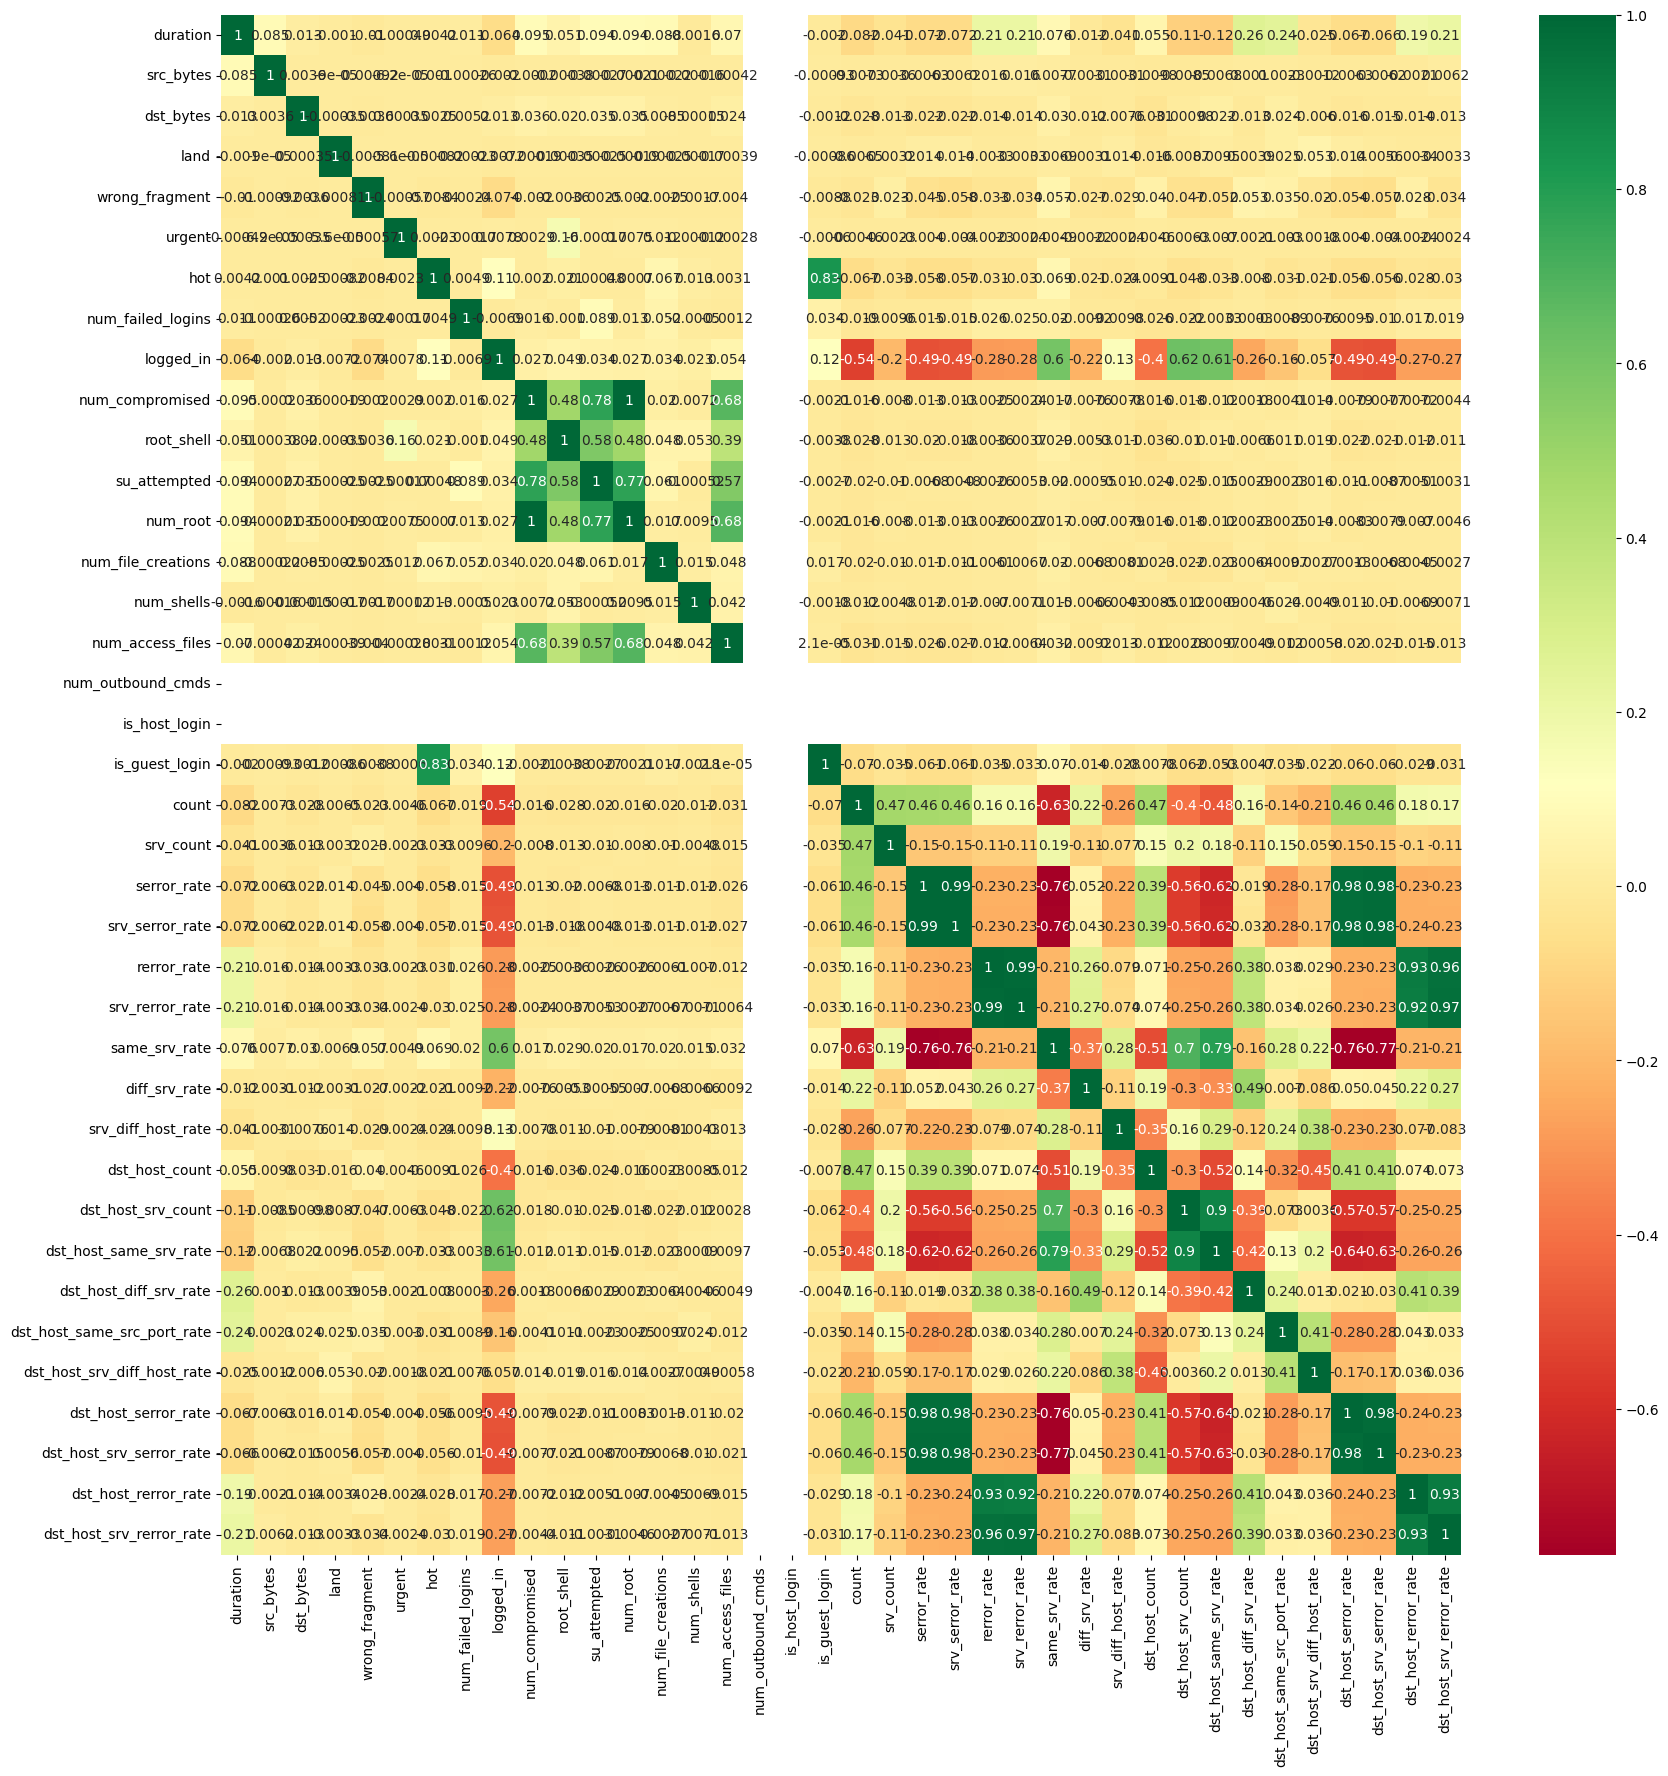

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("/content/Train_data.csv")

X = data.iloc[:,4:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Implementation of Forward Feature Selection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from mlxtend.feature_selection import SequentialFeatureSelector

data = pd.read_csv("/content/Train_data.csv")
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


shape of the data

In [ ]:
data.shape

(25192, 42)

In [ ]:
# checking missing values in the data
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
# creating the training data
X = data.drop(['duration', 'class'], axis=1)
y = data['class']
X.shape, y.shape

((25192, 40), (25192,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pip install mlxtend

In [ ]:
!pip install --upgrade mlxtend
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 3.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# Import the necessary libraries
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder  # Example of categorical column conversion

# Read the dataset
data = pd.read_csv("/content/Train_data.csv")

# Convert categorical columns to numerical using one-hot encoding
# Example: Convert column 'category' to numerical using one-hot encoding
# Define the columns to encode
columns_to_encode = ['protocol_type', 'service', 'flag', 'class']

# Apply one-hot encoding to the specified columns
data = pd.get_dummies(data, columns=columns_to_encode)
print(data.head())

# Define the features and the target variable
X = data.drop('flag_SF', axis=1)
print(X)
y = data['flag_SF']
print(y)

# Apply Forward Feature Selection
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=4, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1.fit(X, y)

# Get the selected feature names
feat_names = list(sfs1.k_feature_names_)
print("\n\n",feat_names,"\n\n")



   duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  flag_RSTOS0  flag_RSTR  \
0                  0          0                0  ...            0          0   
1                  0          0                0  ...            0          0   
2                  0          0                0  ...            0          0   
3                  0          1                0  ...            0          0   
4                  0          1                0  ...            0          0   

   flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  flag_SH  class_anomaly  \
0     

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.6s

[2024-01-18 03:50:16] Features: 1/4 -- score: -0.07603044147333764[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.2s

[2024-01-18 03:50:23] Features: 2/4 -- score: -0.05750684810585035[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.0s

[2024-01-18 03:50:31] Features: 3/4 -- score: -0.004891846422009272[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.1s




 ['serror_rate', 'rerror_rate', 'same_srv_rate', 'flag_S0'] 





[2024-01-18 03:50:37] Features: 4/4 -- score: -0.004439654938854927

In [ ]:
# Create a new dataframe with the selected features and the target variable
new_data = data[feat_names]
print(new_data)
new_data['flag_SF'] = data['flag_SF']
print(new_data)
new_data.head()
# Train the model using the selected features
# Example: lreg.fit(new_data.drop('count', axis=1), new_data['count'])

       serror_rate  rerror_rate  same_srv_rate  flag_S0
0              0.0          0.0           1.00        0
1              0.0          0.0           0.08        0
2              1.0          0.0           0.05        1
3              0.2          0.0           1.00        0
4              0.0          0.0           1.00        0
...            ...          ...            ...      ...
25187          0.0          1.0           0.07        0
25188          0.0          0.0           1.00        0
25189          0.0          1.0           0.07        0
25190          1.0          0.0           0.14        1
25191          1.0          0.0           0.24        1

[25192 rows x 4 columns]
       serror_rate  rerror_rate  same_srv_rate  flag_S0  flag_SF
0              0.0          0.0           1.00        0        1
1              0.0          0.0           0.08        0        1
2              1.0          0.0           0.05        1        0
3              0.2          0.0           

<ipython-input-39-c9ae3bb0b942>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['flag_SF'] = data['flag_SF']


,serror_rate,rerror_rate,same_srv_rate,flag_S0,flag_SF
0,0.0,0.0,1.00,0,1
1,0.0,0.0,0.08,0,1
2,1.0,0.0,0.05,1,0
3,0.2,0.0,1.00,0,1
4,0.0,0.0,1.00,0,1


from matplotlib import pyplot as plt
_df_0['serror_rate'].plot(kind='hist', bins=20, title='serror_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['same_srv_rate'].plot(kind='hist', bins=20, title='same_srv_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['flag_S0'].plot(kind='hist', bins=20, title='flag_S0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['flag_SF'].plot(kind='hist', bins=20, title='flag_SF')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='serror_rate', y='same_srv_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='same_srv_rate', y='flag_S0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='flag_S0', y='flag_SF', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['rerror_rate']
  ys = series['serror_rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('rerror_rate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rerror_rate')
_ = plt.ylabel('serror_rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['rerror_rate']
  ys = series['same_srv_rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('rerror_rate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rerror_rate')
_ = plt.ylabel('same_srv_rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['rerror_rate']
  ys = series['flag_S0']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('rerror_rate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rerror_rate')
_ = plt.ylabel('flag_S0')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['rerror_rate']
  ys = series['flag_SF']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('rerror_rate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rerror_rate')
_ = plt.ylabel('flag_SF')

from matplotlib import pyplot as plt
_df_11['serror_rate'].plot(kind='line', figsize=(8, 4), title='serror_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['same_srv_rate'].plot(kind='line', figsize=(8, 4), title='same_srv_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['flag_S0'].plot(kind='line', figsize=(8, 4), title='flag_S0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['flag_SF'].plot(kind='line', figsize=(8, 4), title='flag_SF')
plt.gca().spines[['top', 'right']].set_visible(False)


Apply the SVM classifier to the Dataset. Is it Linear or non-linear classification? Also, use a Decision tree for classification.

In [15]:
import pandas as pd
data = pd.read_csv("/content/Train_data.csv")
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

In [16]:
X_train = training_set.iloc[:,30:41].values
Y_train = training_set.iloc[:,41].values
X_test = test_set.iloc[:,30:41].values
Y_test = test_set.iloc[:,41].values

non-linear classification is achieved using non-linear kernel functions such as polynomial or radial basis function (RBF) kernels.

In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)

SVC(random_state=1)

Predicting the classes for test set

In [ ]:
Y_pred = classifier.predict(X_test)
test_set["Predictions"] = Y_pred

In [ ]:
test_set

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,Predictions
20766,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.09,0.00,0.00,1.0,1.0,0.0,0.0,anomaly,anomaly
8733,0,tcp,http,SF,322,3327,0,0,0,0,...,1.00,0.00,0.05,0.04,0.0,0.0,0.0,0.0,normal,normal
6975,0,tcp,time,S0,0,0,0,0,0,0,...,0.08,0.05,0.00,0.00,1.0,1.0,0.0,0.0,anomaly,anomaly
10356,0,tcp,smtp,SF,1502,341,0,0,0,0,...,0.56,0.03,0.01,0.01,0.0,0.0,0.0,0.0,normal,normal
1339,0,tcp,http,SF,360,1738,0,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6054,0,tcp,smtp,SF,1194,369,0,0,0,0,...,1.00,0.00,1.00,0.01,0.0,0.0,0.0,0.0,normal,anomaly
5531,0,tcp,http,SF,346,5859,0,0,0,0,...,1.00,0.00,0.12,0.03,0.0,0.0,0.0,0.0,normal,normal
5283,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,anomaly,normal
10911,0,tcp,netbios_ns,REJ,0,0,0,0,0,0,...,0.01,0.07,0.00,0.00,0.0,0.0,1.0,1.0,anomaly,anomaly


from matplotlib import pyplot as plt
test_set['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test_set['src_bytes'].plot(kind='hist', bins=20, title='src_bytes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test_set['dst_bytes'].plot(kind='hist', bins=20, title='dst_bytes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test_set['land'].plot(kind='hist', bins=20, title='land')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
test_set.groupby('protocol_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
test_set.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
test_set.groupby('Predictions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test_set.plot(kind='scatter', x='duration', y='src_bytes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test_set.plot(kind='scatter', x='src_bytes', y='dst_bytes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test_set.plot(kind='scatter', x='dst_bytes', y='land', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
test_set.plot(kind='scatter', x='land', y='wrong_fragment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['urgent']
  ys = series['duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = test_set.sort_values('urgent', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('protocol_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='protocol_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('urgent')
_ = plt.ylabel('duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['urgent']
  ys = series['duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = test_set.sort_values('urgent', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('class')):
  _plot_series(series, series_name, i)
  fig.legend(title='class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('urgent')
_ = plt.ylabel('duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['urgent']
  ys = series['duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = test_set.sort_values('urgent', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Predictions')):
  _plot_series(series, series_name, i)
  fig.legend(title='Predictions', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('urgent')
_ = plt.ylabel('duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['urgent']
  ys = series['src_bytes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = test_set.sort_values('urgent', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('protocol_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='protocol_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('urgent')
_ = plt.ylabel('src_bytes')

from matplotlib import pyplot as plt
test_set['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
test_set['src_bytes'].plot(kind='line', figsize=(8, 4), title='src_bytes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
test_set['dst_bytes'].plot(kind='line', figsize=(8, 4), title='dst_bytes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
test_set['land'].plot(kind='line', figsize=(8, 4), title='land')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['class'].value_counts()
    for x_label, grp in test_set.groupby('protocol_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('protocol_type')
_ = plt.ylabel('class')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Predictions'].value_counts()
    for x_label, grp in test_set.groupby('class')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('class')
_ = plt.ylabel('Predictions')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(test_set['protocol_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(test_set, x='duration', y='protocol_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(test_set['class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(test_set, x='duration', y='class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(test_set['Predictions'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(test_set, x='duration', y='Predictions', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(test_set['protocol_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(test_set, x='src_bytes', y='protocol_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.8694185354236952


Visualizing the classifier

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)

SVC(random_state=1)

Decision Tree for classification

In [3]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [19]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.4834292518356817


Optimizing Decision Tree Performance

In [20]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5251041873387577


Visualizing Decision Trees

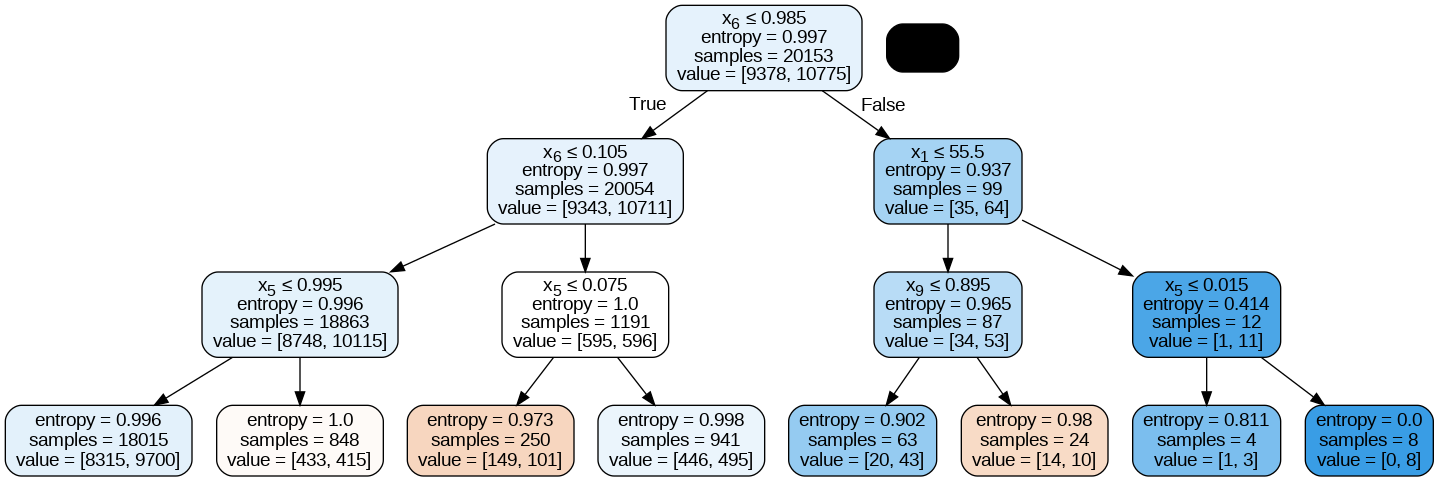

In [22]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())